# PROBLEM STATEMENT


- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.  

- Data set:
  - Input (X): Outside Air Temperature
  - Output (Y): Overall daily revenue generated in dollars 

- This example is a regression example, we will cover regression in more details in future projects. 


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# STEP #1: IMPORT DATASET

In [2]:
# import CSV file entitled "SalesData.csv"
df = pd.read_csv('/content/drive/My Drive/Data/SalesData.csv')
df.head()


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [3]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# STEP #2: VISUALIZE DATASET

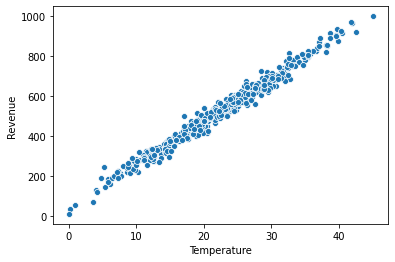

In [5]:
sns.scatterplot(x='Temperature', y= 'Revenue', data=df)

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [22]:
X_train= df['Temperature']
y_train= df['Revenue']

# STEP#4: BUILD AND TRAIN THE MODEL

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_shape=[1]))
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error'  )

In [8]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
epochs_hist = model.fit(X_train,y_train, epochs=200)

Epoch 1/200
16/16 [==============================] - 0s 2ms/step - loss: 214545.5938
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 79995.8984
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 20048.8398
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 2864.8374
Epoch 5/200
16/16 [==============================] - 0s 2ms/step - loss: 746.3506
Epoch 6/200
16/16 [==============================] - 0s 2ms/step - loss: 730.4116
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 701.3355
Epoch 8/200
16/16 [==============================] - 0s 2ms/step - loss: 682.6281
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 679.7963
Epoch 10/200
16/16 [==============================] - 0s 2ms/step - loss: 679.6551
Epoch 11/200
16/16 [==============================] - 0s 2ms/step - loss: 678.2813
Epoch 12/200
16/16 [==============================] - 0s 2ms/step - loss: 678.6261
Epoch

# STEP#5: EVALUATE THE MODEL 

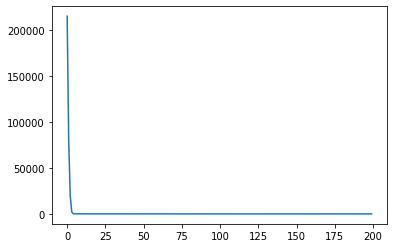

In [10]:
plt.plot(epochs_hist.history['loss'])

In [11]:
model.get_weights()

[array([[21.434324]], dtype=float32), array([44.73633], dtype=float32)]

In [12]:
# Use the trained model to perform predictions

temp=[40]
Revenue= model.predict(temp)
print('the revenue for a temperature of' , temp, 'is ', Revenue)

the revenue for a temperature of [40] is  [[902.1093]]


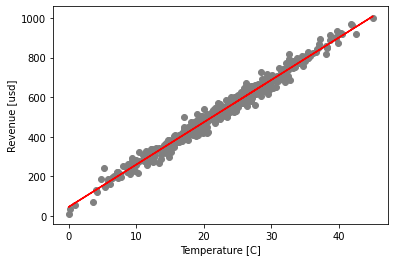

In [15]:
y_pred = model.predict(X_train)
plt.scatter(X_train, y_train , marker='o' , color='gray')
plt.plot(X_train,y_pred, color='red')
plt.xlabel("Temperature [C]")
plt.ylabel("Revenue [usd]")
plt.show()

# STEP #6 (OPTIONAL): CONFIRM USING REGRESSION KIT IN SCIKIT LEARN!

In [25]:
X_tr= X_train.values.reshape(-1,1)
y_tr = y_train.values.reshape(-1,1)

(500,)

(500, 1)

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_tr, y_tr)
y_pred= lm.predict(X_tr)
print('Linear Model Coefficient (m):',lm.coef_ , '\n' , 'Linear Model Coefficient (b):' ,lm.intercept_ )

Linear Model Coefficient (m): [[21.44362551]] 
 Linear Model Coefficient (b): [44.83126709]


Linear Model Coefficient (m):  [[21.44362551]]
Linear Model Coefficient (b):  [44.83126709]


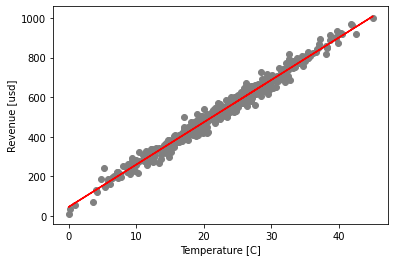

In [28]:
y_pred = model.predict(X_train)
plt.scatter(X_tr, y_tr , marker='o' , color='gray')
plt.plot(X_tr,y_pred, color='red')
plt.xlabel("Temperature [C]")
plt.ylabel("Revenue [usd]")
plt.show()

# EXCELLENT JOB & CONGRATULATIONS! NOW YOU HAVE BUILT YOUR SECOND NEURAL NETWORK MODEL USING TENSORFLOW 2.0 IN GOOGLE COLAB! 